<a href="https://colab.research.google.com/github/IraStreltsova/LA_Crime_Project/blob/main/LA_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [4]:
# Load the dataset
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Check the first few rows
print(data.head())

# Check the data types and missing values
print(data.info())


       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

In [6]:
# Convert date columns to datetime
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Extract the hour from the 'TIME OCC' column
#data['Hour OCC'] = pd.to_datetime(data['TIME OCC'], format='%H%M').dt.hour

# Handle missing values if necessary
# data.dropna(subset=['LAT', 'LON'], inplace=True)

# Drop unnecessary columns if needed
# data = data.drop(columns=['Cross Street'])

# Verify the changes
print(data.head())


       DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  Rpt Dist No  \
0   10304468 2020-01-08 2020-01-08      2230     3    Southwest          377   
1  190101086 2020-01-02 2020-01-01       330     1      Central          163   
2  200110444 2020-04-14 2020-02-13      1200     1      Central          155   
3  191501505 2020-01-01 2020-01-01      1730    15  N Hollywood         1543   
4  191921269 2020-01-01 2020-01-01       415    19      Mission         1998   

   Part 1-2  Crm Cd                                        Crm Cd Desc  ...  \
0         2     624                           BATTERY - SIMPLE ASSAULT  ...   
1         2     624                           BATTERY - SIMPLE ASSAULT  ...   
2         2     845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...   
3         2     745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...   
4         2     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   

  Status   Status Desc Crm Cd 1 Crm Cd 2  Cr

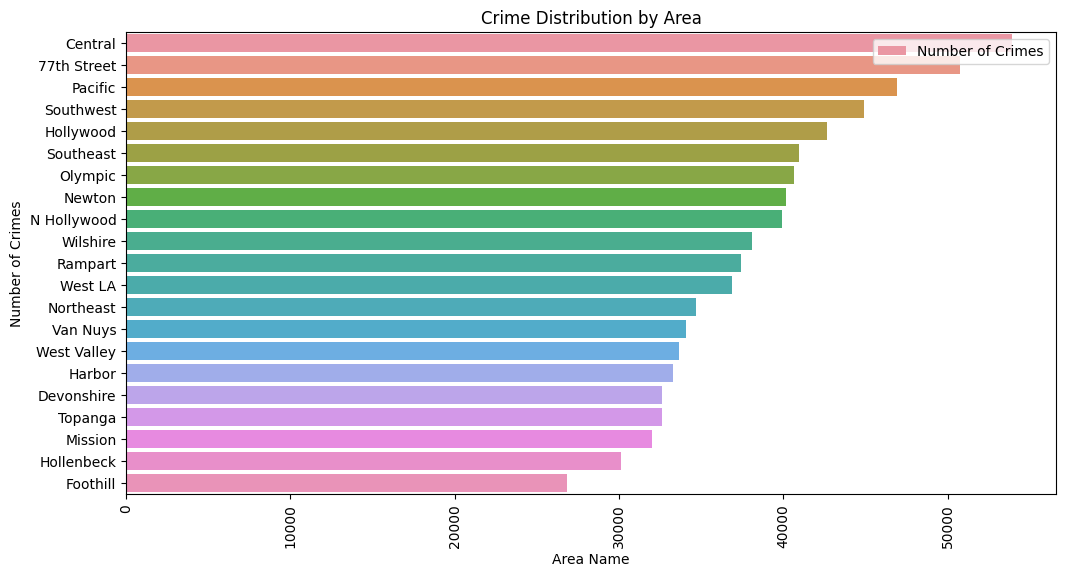

In [14]:
# Crime distribution by area
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='AREA NAME', order=data['AREA NAME'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Crime Distribution by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Crimes')
plt.show()


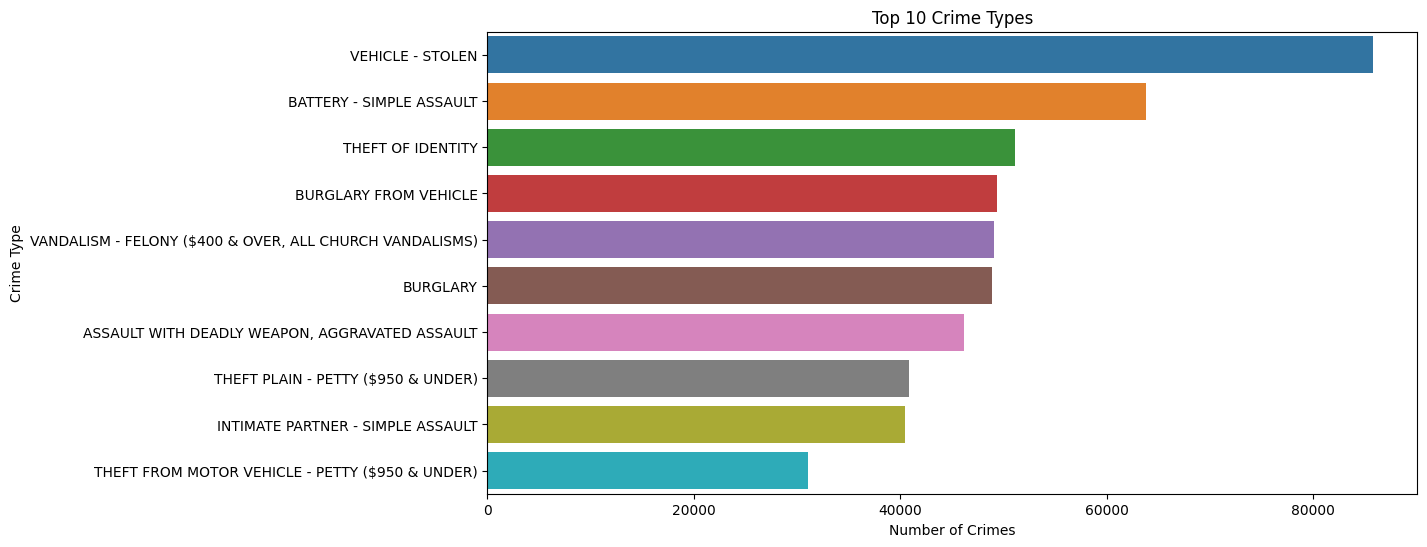

In [9]:
# Crime distribution by crime type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Crm Cd Desc', order=data['Crm Cd Desc'].value_counts().index[:10])
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.show()



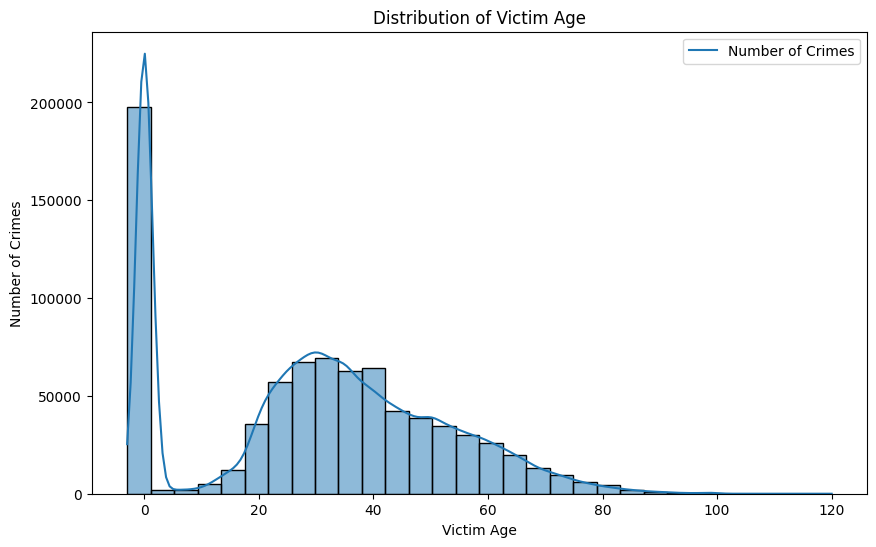

In [15]:
# Crime distribution by victim age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Vict Age', bins=30, kde=True)
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
# Add legend
plt.legend(labels=['Number of Crimes'], loc='upper right')
plt.show()


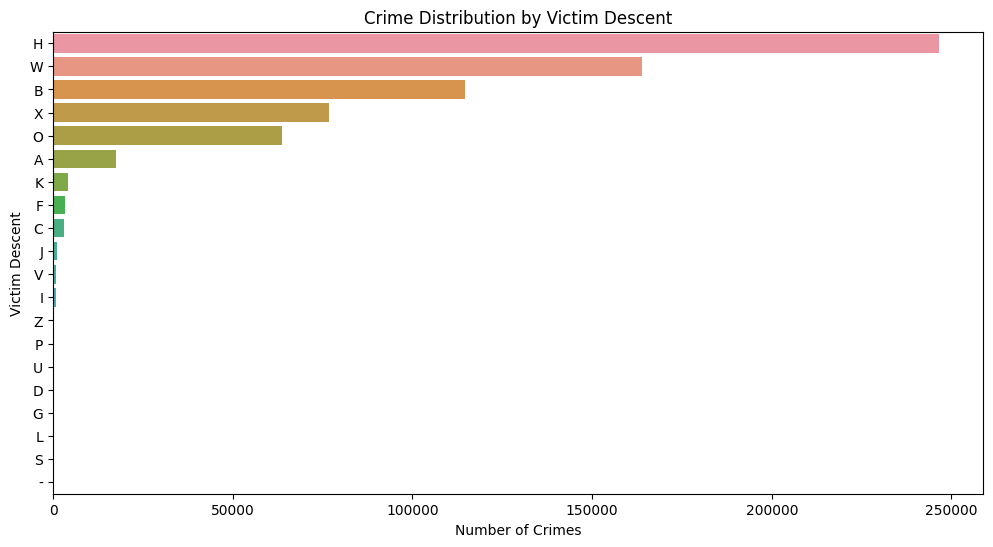

In [11]:
# Crime distribution by victim descent
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Vict Descent', order=data['Vict Descent'].value_counts().index)
plt.title('Crime Distribution by Victim Descent')
plt.xlabel('Number of Crimes')
plt.ylabel('Victim Descent')
plt.show()
